# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City processed: bluff
City processed: khatanga
City NOT found: belushya guba
City processed: mogadishu
City processed: quelimane
City processed: tuktoyaktuk
City processed: punta arenas
City processed: butaritari
City processed: quatre cocos
City processed: nikolskoye
City processed: mataura
City processed: busselton
City processed: chalus
City processed: atuona
City processed: harrisonburg
City processed: geraldton
City NOT found: barawe
City processed: jamestown
City processed: isangel
City processed: ushuaia
City processed: puerto ayora
City processed: saint-philippe
City processed: saint anthony
City NOT found: barentsburg
City processed: karasjok
City NOT found: mocambique
City processed: fortuna
City processed: yellowknife
City processed: kaitangata
City NOT found: tsihombe
City processed: cidreira
City processed: aksha
City processed: port blair
City processed: port alfred
City processed: ribeira grande
City processed: boralday
City processed: mahebourg
City processed: hobart
Ci

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

city_data.count()




City           562
Country        562
Temperature    562
Humidity       562
Cloudiness     562
Windspeed      562
Latitude       562
Longitude      562
Date           562
dtype: int64

In [20]:
# Display sample data
city_data.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,bluff,NZ,44.80,55,97,9.57,-46.6000,168.3333,1680012627
1,khatanga,RU,-10.44,95,100,12.66,71.9667,102.5000,1680012758
2,mogadishu,SO,83.35,72,4,16.87,2.0371,45.3438,1680012759
3,quelimane,MZ,75.56,86,98,11.30,-17.8786,36.8883,1680012663
4,tuktoyaktuk,CA,19.54,87,100,12.33,69.4541,-133.0374,1680012759


In [24]:
# Export the City_Data into a csv
city_data.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,bluff,NZ,44.80,55,97,9.57,-46.6000,168.3333,1680012627
1,khatanga,RU,-10.44,95,100,12.66,71.9667,102.5000,1680012758
2,mogadishu,SO,83.35,72,4,16.87,2.0371,45.3438,1680012759
3,quelimane,MZ,75.56,86,98,11.30,-17.8786,36.8883,1680012663
4,tuktoyaktuk,CA,19.54,87,100,12.33,69.4541,-133.0374,1680012759


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

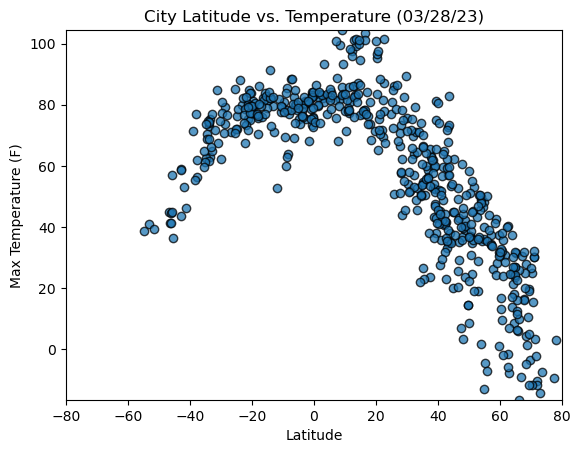

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data['Latitude'],city_data['Temperature'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Temperature'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.xlim(-80,80)
plt.ylim(min(city_data['Temperature']),max(city_data['Temperature']))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

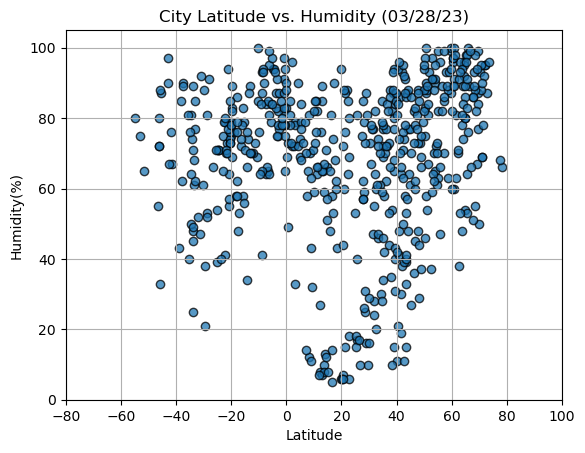

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data['Latitude'],city_data['Humidity'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Humidity'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity(%)')
plt.xlim(-80,100)
plt.ylim(min(city_data['Humidity'])-5,max(city_data['Humidity'])+5)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

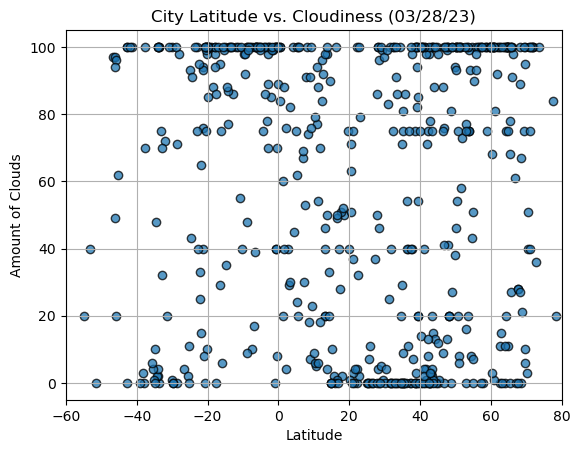

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data['Latitude'],city_data['Cloudiness'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Cloudiness'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Amount of Clouds')
plt.xlim(-60,80)
plt.ylim(min(city_data['Cloudiness'])-5,max(city_data['Cloudiness'])+5)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

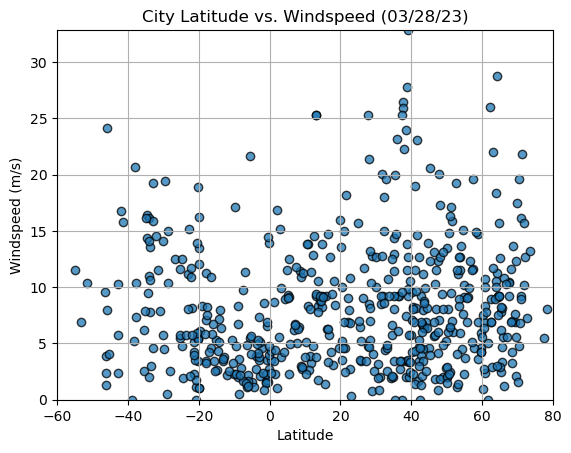

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data['Latitude'],city_data['Windspeed'],alpha=0.75,edgecolors='black')
plt.title(f"City Latitude vs. {'Windspeed'} ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Windspeed (m/s)')
plt.xlim(-60,80)
plt.ylim(min(city_data['Windspeed']),max(city_data['Windspeed']))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data.loc[city_data["Latitude"] > 0]


# Display sample data
northern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
1,khatanga,RU,-10.44,95,100,12.66,71.9667,102.5000,1680012758
2,mogadishu,SO,83.35,72,4,16.87,2.0371,45.3438,1680012759
4,tuktoyaktuk,CA,19.54,87,100,12.33,69.4541,-133.0374,1680012759
6,butaritari,KI,82.08,79,29,15.14,3.0707,172.7902,1680012760
8,nikolskoye,RU,31.91,99,100,5.95,59.7035,30.7861,1680012760


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data.loc[city_data["Latitude"] < 0]

# Display sample data
southern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,bluff,NZ,44.80,55,97,9.57,-46.6000,168.3333,1680012627
3,quelimane,MZ,75.56,86,98,11.30,-17.8786,36.8883,1680012663
5,punta arenas,CL,41.02,75,40,6.91,-53.1500,-70.9167,1680012760
7,quatre cocos,MU,79.09,75,98,5.39,-20.2078,57.7625,1680012760
9,mataura,NZ,44.47,80,49,1.30,-46.1927,168.8643,1680012760


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8690365889938668
y = -1.23x + 99.08


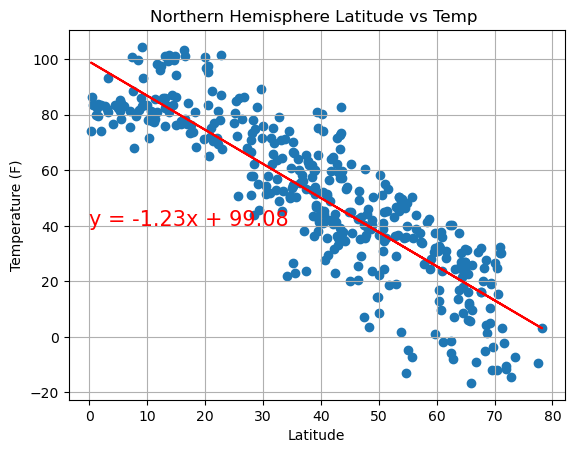

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig5.png")
plt.show()

The r-square is 0.6857023386142999
y = 0.56x + 84.75


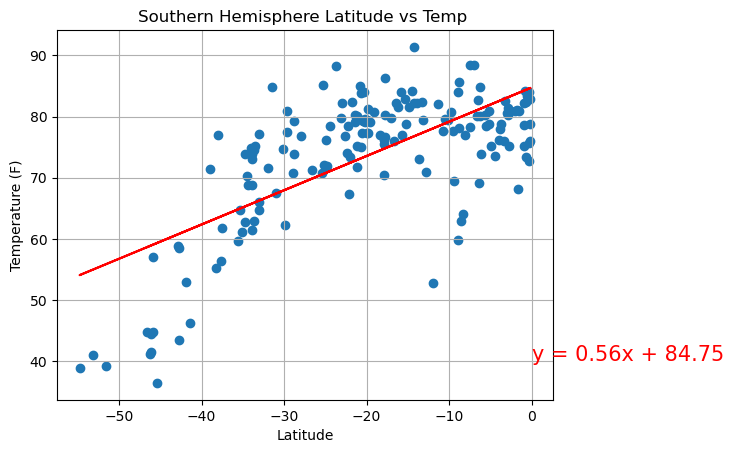

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere and max temperature have a negative relationship. However, the southern hemisphere and temperature show a positive relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.3683097552310731
y = 0.46x + 48.43


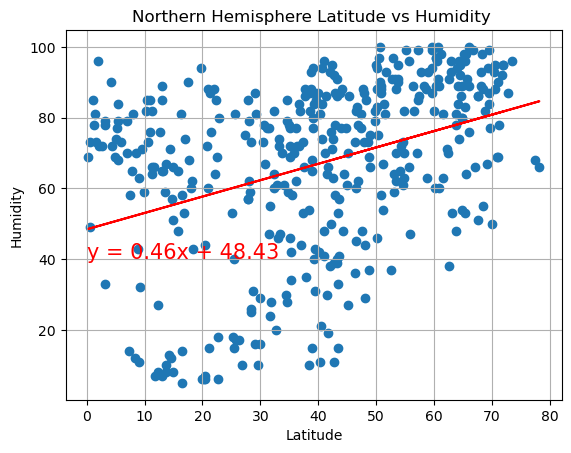

In [49]:
# Northern Hemisphere
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig7.png")
plt.show()

The r-square is 0.32681158209542377
y = 0.37x + 80.65


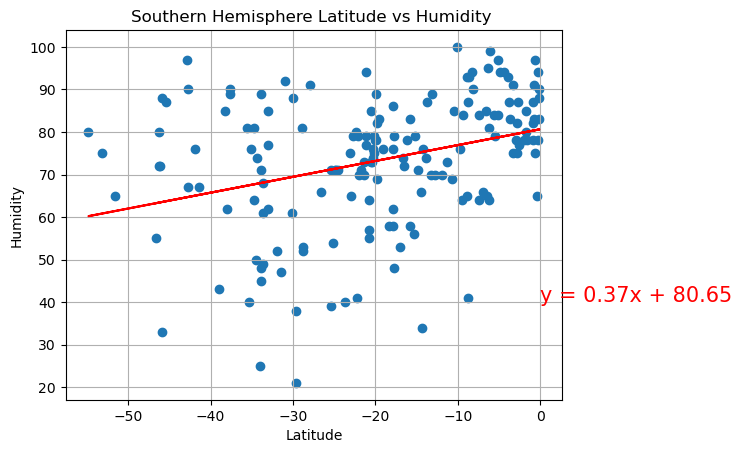

In [51]:
# Southern Hemisphere
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemisphere show positive correlation between latitude and humidity. As latitude increases, so does the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.17640283363259565
y = 0.37x + 39.08


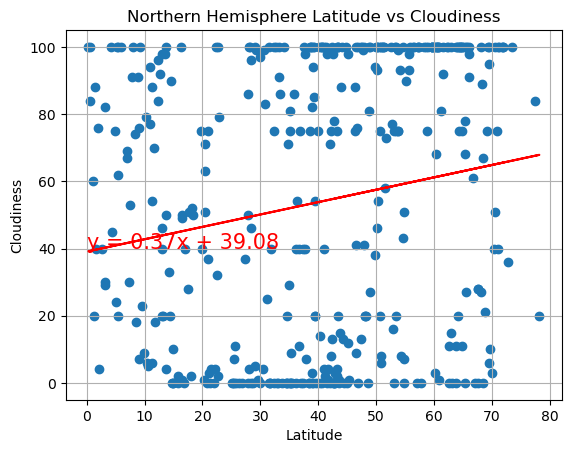

In [52]:
# Northern Hemisphere
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig9.png")
plt.show()

The r-square is 0.34108591259987664
y = 0.96x + 88.59


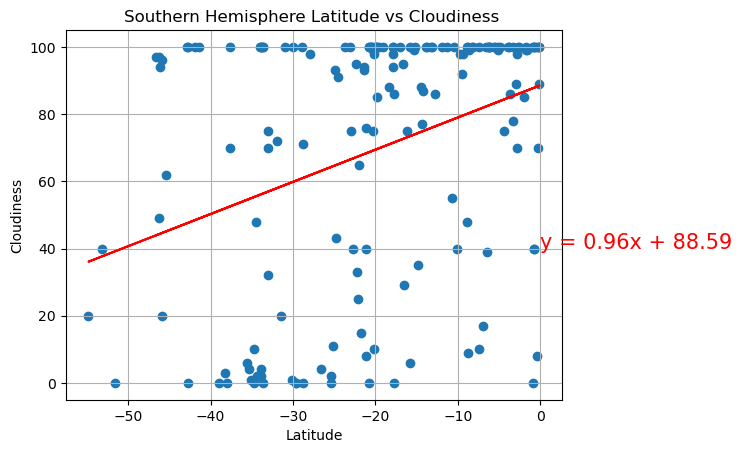

In [53]:
# Southern Hemisphere
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** While the data is showing a slight positive correlation for both the southern and northen hemispheres as latitude increases for cloudiness, the data is more widespread.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.060076317398903616
y = 0.02x + 7.82


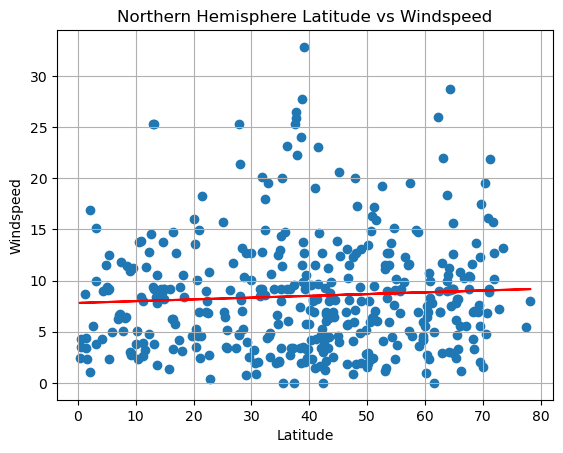

In [54]:
# Northern Hemisphere
x_values = northern_df["Latitude"]
y_values = northern_df["Windspeed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Windspeed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Windspeed')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig11.png")
plt.show()

The r-square is -0.36571633026261186
y = -0.14x + 4.13


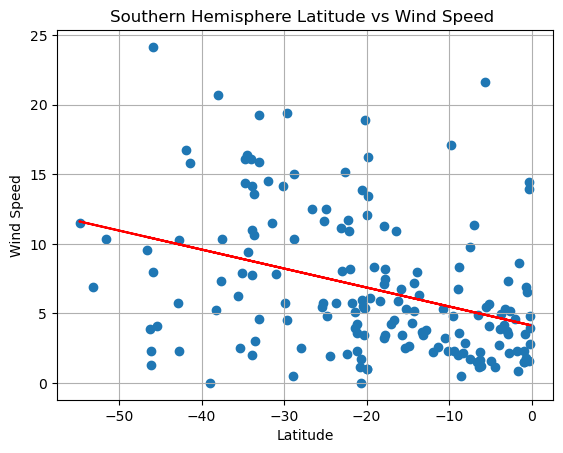

In [55]:
# Southern Hemisphere
x_values = southern_df["Latitude"]
y_values = southern_df["Windspeed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed ')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** While the data shows no correlation between windspeed and the latitude in the northern hemisphere, it shows a negative correlation between windspeed and latitude in the southern hemisphere. 